# Assignment 1 Kanton ZH

## Installation
1. ```bash pip3 install -r requirements.txt  ```
2. Dieses Notebook ausführen

## Data Fetching

Für das Data Fetching habe ich ein dediziertes File ```fetch-data.py``` erstellt. Dieses Skript lädt die Daten vom Datenkatalog des Kanton Zürich, Scraped HTML Tabellen vom Bundesamt für Statistik, Ruft die Seach-API des Kanton Zürich auf undruft die Wikimedia API auf um die Seiten Ansichten einer bestimmten Seite und Jahr im Alemanischem WIkipedia zu erhalten.

Alle Daten werden in einem CSV im data/raw gespeichert

## Preprocessing

Im PreProcessing werden die Daten aus dem CSV ausgeleseb und Invalide Datensätze Ausgefiltert. Das Jahr 2021 ist das aktuellste Jahr, deswegen werden alle anderen Jahre aus dem Datensatz entfernt. Die Daten werden in ein neues CSV im data/processed gespeichert.

Das Prepocessing wird in einem dedizierten File ```preprocessing.py``` durchgeführt.

### Findings

- Die Gemeinden Adlikon, Andelfingen und Humlikon fusionierten zu Andelfingen am 01.01.2023. Deswegen wird die Gemeinde Adlikon mit der neuen BFS Nummer (291) aus dem Datensatz entfernt.





In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Fetch Data Ausführen

In [2]:
%run './fetch-data.py'

/Users/noebrehm/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Download complete
Download complete
Download complete
Download complete
Download complete
Download complete
Download complete
Download complete
Download complete
Download complete
Download complete
Download complete
Searching Kanton Zürich website for keyword: Adlikon
Searching Kanton Zürich website for keyword: Humlikon
Searching Kanton Zürich website for keyword: Andelfingen
Searching Kanton Zürich website for keyword: Kloten
Searching Kanton Zürich website for keyword: Nürensdorf
Searching Kanton Zürich website for keyword: Affoltern am Albis
Searching Kanton Zürich website for keyword: Altikon
Searching Kanton Zürich website for keyword: Bachs
Searching Kanton Zürich website for keyword: Bäretswil
Searching Kanton Zürich website for keyword: Benken
Searching Kanton Zürich website for keyword: Berg am Irchel
Searching Kanton Zürich website for keyword: Bonstetten
Searching Kanton Zürich website for keyword: Boppelsen
Searching Kanton Zürich website for keyword: Brütten
Searching Kan

## Preprocessing Ausführen

In [3]:
## Preprocessing Ausführen
%run "./preproccessing.py"

Pfad zu den preprocessed Data und erstellt ein neuer Ordner um die einzeilnen Rankings abzuspeichern

In [2]:
data_path = os.path.join(os.getcwd(), "data", "preprocessed")
#Create output for the reults
output_path = os.path.join(os.getcwd(),'data', "ranking")
if not os.path.exists(output_path):
    os.makedirs(output_path)

## Load Required Data

Liesst die vorbereiteten CSV Files aus und entfernt für das Ranking unnötige Spalten

In [3]:
df_ranking_1 = pd.DataFrame()

df_wiki = pd.read_csv(os.path.join(data_path, "wiki_pageviews.csv"))
df_burglary = pd.read_csv(os.path.join(data_path, "Einbrueche.csv"))
df_assets = pd.read_csv(os.path.join(data_path, "NettoVermögen.csv"))
df_accidents = pd.read_csv(os.path.join(data_path, "Unfaelle.csv"))
df_voting = pd.read_csv(os.path.join(data_path, "abstimmung.csv"))
df_students = pd.read_csv(os.path.join(data_path, "Berufsschueeler.csv"))
df_kanton_search = pd.read_csv(os.path.join(data_path, "kanton_matches_by_commune.csv"))
df_distance_next_stop = pd.read_csv(os.path.join(data_path, "DistanzZurNächstenHaltestelle.csv"))
df_sheeps = pd.read_csv(os.path.join(data_path, "Schafe.csv"))
df_tax = pd.read_csv(os.path.join(data_path, "SteuerKraftProKopf.csv"))



In [4]:
## Drop unnecessary columns
df_assets = df_assets[['BFS_NR', 'INDIKATOR_VALUE', 'GEBIET_NAME']]
df_assets = df_assets.rename(columns={'INDIKATOR_VALUE': 'NET_ASSETS'})

df_accidents = df_accidents[['BFS_NR', 'INDIKATOR_VALUE']]
df_accidents = df_accidents.rename(columns={'INDIKATOR_VALUE': 'ACCIDENTS'})

df_voting = df_voting[['BFS_NR', 'Ungültige']]
df_voting = df_voting.rename(columns={'Ungültige': 'INVALID_VOTES'})

df_burglary = df_burglary[['BFS_NR', 'Häufigkeitszahl']]
df_burglary = df_burglary.rename(columns={'BFS_NR': 'BFS_NR', 'Häufigkeitszahl': 'BURGLARY'})

df_students = df_students[['BFS_NR', 'INDIKATOR_VALUE', 'GEBIET_NAME']]
df_students = df_students.rename(columns={'INDIKATOR_VALUE': 'STUDENTS'})

df_kanton_search = df_kanton_search[['BFS_NR', 'matches']]
df_kanton_search = df_kanton_search.rename(columns={'matches': 'SEARCH_MATCHES'})
# Convert BFS_NR to float
df_kanton_search['BFS_NR'] = df_kanton_search['BFS_NR'].astype(float)

df_distance_next_stop = df_distance_next_stop[['BFS_NR', 'INDIKATOR_VALUE']]
df_distance_next_stop = df_distance_next_stop.rename(columns={'INDIKATOR_VALUE': 'DISTANCE_NEXT_STOP'})

df_sheeps = df_sheeps[['BFS_NR', 'INDIKATOR_VALUE']]
df_sheeps = df_sheeps.rename(columns={'INDIKATOR_VALUE': 'SHEEPS'})

df_tax = df_tax[['BFS_NR', 'INDIKATOR_VALUE']]
df_tax = df_tax.rename(columns={'INDIKATOR_VALUE': 'TAX'})

## Ranking 1

### Features

- Netto Einkommen
- Anzahl Einbrüche
- Anzahl Unfälle

Gemeinde die ein Negatives Netto Vermögen haben werden durch aktiv bestraft und desewgen wurde der Datensatz nicht zwischen 0-100  normalisiert und negative werte zugelassen

### Anmerkungen

Um die grossen Gemeinden wie Zürich, Winterthur und Wädenswil nicht an der Spitze zu haben, habe ich alle Gemeinde mit mindestens einer Ungültigen Stimme bei der Abstimmung zum Energiegesetz 28.11.2021 entfernt. (Dies wurde auch beim Ranking 2 und 3 angewendet



In [5]:
df_ranking_1 = df_burglary.copy()
df_ranking_1 = df_ranking_1.merge(df_assets, on='BFS_NR', how='left')
df_ranking_1 = df_ranking_1.merge(df_accidents, on='BFS_NR', how='left')
df_ranking_1 = df_ranking_1.merge(df_voting, on='BFS_NR', how='left')

## Remove communes with invalid votes
df_ranking_1 = df_ranking_1[df_ranking_1['INVALID_VOTES'] == 0.0]
df_ranking_1 = df_ranking_1.drop(columns=[ 'INVALID_VOTES'])

scale = 100

df_ranking_1['NET_ASSETS'] = df_ranking_1['NET_ASSETS'] / df_ranking_1['NET_ASSETS'].max() * scale
df_ranking_1['ACCIDENTS'] = df_ranking_1['ACCIDENTS'] / df_ranking_1['ACCIDENTS'].max() * scale

## Reverse the scale of the burglary and Accidents 
df_ranking_1['ACCIDENTS'] = scale - df_ranking_1['ACCIDENTS']

df_ranking_1['BURGLARY'] = df_ranking_1['BURGLARY'] / df_ranking_1['BURGLARY'].max() * scale
df_ranking_1['BURGLARY'] = scale - df_ranking_1['BURGLARY']

## Create a new Columns with the mean of the three columns
df_ranking_1['mean'] = df_ranking_1[['NET_ASSETS', 'ACCIDENTS', 'BURGLARY']].mean(axis=1)

## Sort the Dataframe by the mean column
df_ranking_1 = df_ranking_1.sort_values(by='mean', ascending=False)

# Add a new column Score with the ranking
df_ranking_1['Score'] = range(1, len(df_ranking_1) + 1)
df_ranking_1.to_csv(os.path.join(output_path, "ranking_1.csv"), index=False)
df_ranking_1


,BFS_NR,BURGLARY,NET_ASSETS,GEBIET_NAME,ACCIDENTS,mean,Score
33,41,100.000000,100.000000,Truttikon,100.000000,100.000000,1
34,43,100.000000,79.962927,Volken,94.779116,91.580681,2
21,28,100.000000,77.447259,Flaach,87.349398,88.265552,3
60,84,80.208333,88.339659,Dällikon,92.570281,87.039425,4
16,23,100.000000,75.973166,Berg a.I.,76.305221,84.092796,5
...,...,...,...,...,...,...,...
152,250,43.750000,3.663165,Urdorf,73.895582,40.436249,127
100,154,54.166667,-40.842087,Küsnacht,82.730924,32.018501,128
151,249,13.541667,3.009974,Unterengstringen,70.080321,28.877321,129
149,247,0.000000,-19.480978,Schlieren,85.341365,21.953462,130


## Visualisierungen Ranking 1 Für den Bericht

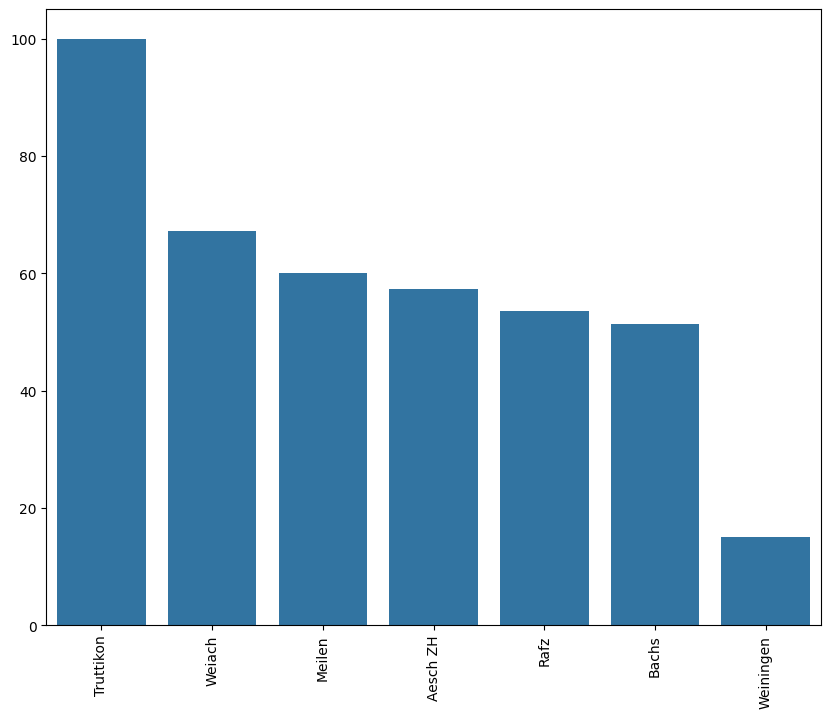

In [8]:
#Plot the data
fig, ax = plt.subplots(figsize=(10, 8))
df_ranking_1_plot = df_ranking_1.copy()

df_ranking_1_plot = df_ranking_1_plot.iloc[[0, 40, 80,90,103,110,len(df_ranking_1_plot.index)-1]]


sns.barplot(x='GEBIET_NAME', y='mean', data=df_ranking_1_plot, ax=ax)
ax.set_ylabel('')
ax.set_xlabel('')

_ = plt.xticks(rotation=90)



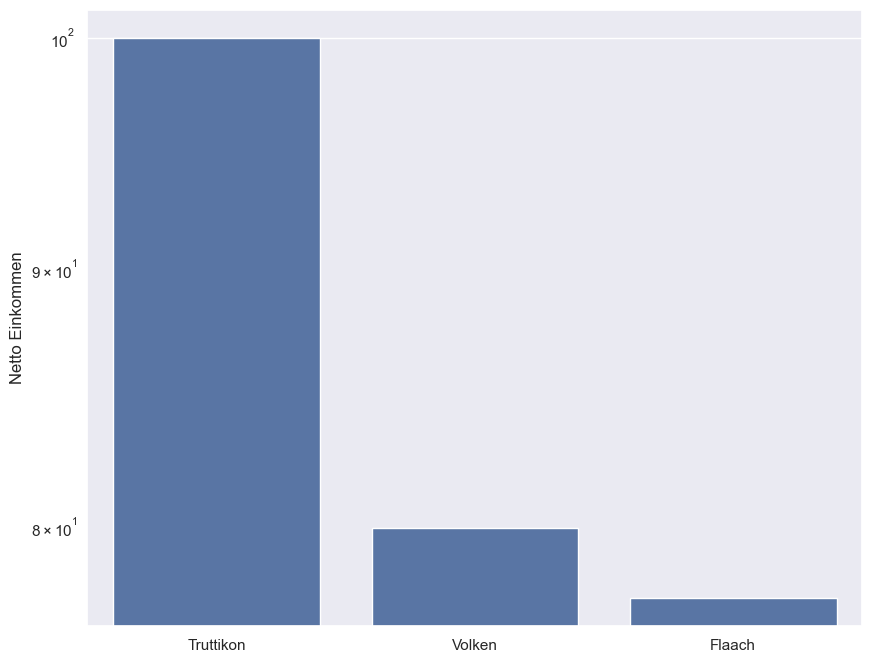

In [9]:
# I need a plot which show the truttikon is the best I already have the ranking above
# Displa NET_ASSETS values the top3 communes NET_ASSETS column


top_3 = df_ranking_1.head(3)
top_3 = top_3.set_index('GEBIET_NAME')
top_3 = top_3.drop(columns=['BFS_NR', 'mean'])
top_3 = top_3.dropna()
sns.set_theme()
# Use different scales for the communes to make the differences more visible
fig2, ax2 = plt.subplots(figsize=(10, 8))



ax2.set_yscale('log')
sns.barplot(x=top_3.index, y='NET_ASSETS', data=top_3, ax=ax2)

ax2.set_ylabel('Netto Einkommen')
ax2.set_xlabel('')



plt.show()




## Ranking 2

### Features
- Anzahl Suchresultate auf der Kantonswebsite wenn nach dem Gemeindename gesucht wird
- Kürzeste Distanz zur nächsten ÖV-Station
- Am wenigsten Berufschüler

In [10]:
df_ranking_2 = df_students.copy()
df_ranking_2 = df_ranking_2.merge(df_kanton_search, on='BFS_NR', how='left')
df_ranking_2 = df_ranking_2.merge(df_distance_next_stop, on='BFS_NR', how='left')
df_ranking_2 = df_ranking_2.merge(df_voting, on='BFS_NR', how='left')



## Remove communes with invalid votes
df_ranking_2 = df_ranking_2[df_ranking_2['INVALID_VOTES'] == 0.0]
df_ranking_2 = df_ranking_2.drop(columns=[ 'INVALID_VOTES'])


scale = 100


df_ranking_2['STUDENTS'] = df_ranking_2['STUDENTS'] / df_ranking_2['STUDENTS'].max() * scale
df_ranking_2['SEARCH_MATCHES'] = df_ranking_2['SEARCH_MATCHES'] / df_ranking_2['SEARCH_MATCHES'].max() * scale
df_ranking_2['DISTANCE_NEXT_STOP'] = df_ranking_2['DISTANCE_NEXT_STOP'] / df_ranking_2['DISTANCE_NEXT_STOP'].max() * scale

# Reverse the scale of the distance to the next stop
df_ranking_2['DISTANCE_NEXT_STOP'] = scale - df_ranking_2['DISTANCE_NEXT_STOP']
# students
df_ranking_2['STUDENTS'] = scale - df_ranking_2['STUDENTS']


df_ranking_2['mean'] = df_ranking_2[['STUDENTS', 'SEARCH_MATCHES', 'DISTANCE_NEXT_STOP']].mean(axis=1)

df_ranking_2 = df_ranking_2.sort_values(by='mean', ascending=False)

df_ranking_2.to_csv(os.path.join(output_path, "ranking_2.csv"), index=False)

df_ranking_2


,BFS_NR,STUDENTS,GEBIET_NAME,SEARCH_MATCHES,DISTANCE_NEXT_STOP,mean
27,34,96.532438,Laufen-Uhwiesen,100.000000,53.816794,83.449744
91,135,90.156600,Kilchberg,30.911063,75.000000,65.355887
102,156,72.818792,Meilen,47.071584,66.984733,62.291703
71,95,98.098434,Regensberg,11.279826,76.526718,61.968326
19,26,97.874720,Dorf,28.118221,58.206107,61.399683
...,...,...,...,...,...,...
142,231,78.299776,Zell,17.516269,25.000000,40.272015
6,7,96.085011,Knonau,14.479393,6.870229,39.144878
14,21,98.098434,Adlikon (bis 2022),11.334056,6.106870,38.513120
133,220,98.434004,Hagenbuch,11.198482,4.007634,37.880040


## Ranking 3

### Features
- Anzahl Seitenaufrufe auf der Alemanischen Wikiseite zur Gemeinde im Jahr 2019
- tiefste Anzahl Schafe 
- tiefste Steuer Kraft Pro Kopf 




In [11]:
df_ranking_3 = df_tax.copy()
df_ranking_3 = df_ranking_3.merge(df_wiki, on='BFS_NR', how='left')
df_ranking_3 = df_ranking_3.merge(df_sheeps, on='BFS_NR', how='left')
df_ranking_3 = df_ranking_3.merge(df_voting, on='BFS_NR', how='left')



## Remove communes with invalid votes
df_ranking_3 = df_ranking_3[df_ranking_3['INVALID_VOTES'] == 0.0]
df_ranking_3 = df_ranking_3.drop(columns=[ 'INVALID_VOTES'])


scale = 100


df_ranking_3['pageviews'] = df_ranking_3['pageviews'] / df_ranking_3['pageviews'].max() * scale
df_ranking_3['SHEEPS'] = df_ranking_3['SHEEPS'] / df_ranking_3['SHEEPS'].max() * scale
df_ranking_3['TAX'] = df_ranking_3['TAX'] / df_ranking_3['TAX'].max() * scale

df_ranking_3['SHEEPS'] = scale - df_ranking_3['SHEEPS']
df_ranking_3['TAX'] = scale - df_ranking_3['TAX']


df_ranking_3['mean'] = df_ranking_3[['pageviews', 'SHEEPS', 'TAX']].mean(axis=1)

df_ranking_3 = df_ranking_3.sort_values(by='mean', ascending=False)

df_ranking_3.to_csv(os.path.join(output_path, "ranking_3.csv"), index=False)

df_ranking_3



,BFS_NR,TAX,Gemeindename,CH_Gemeindename_wikipedia,pageviews,SHEEPS,mean
123,198,51.47116,Uster,Uster,100.000000,93.516874,81.662678
145,243,51.47116,Dietikon,Dietikon,73.716381,99.200710,74.796084
40,56,51.47116,Embrach,Embrach,80.867971,91.651865,74.663665
21,28,51.47116,Flaach,Flaach,59.902200,100.000000,70.457787
59,83,51.47116,Buchs (ZH),Buchs ZH,62.102689,97.158082,70.243977
...,...,...,...,...,...,...,...
79,111,51.47116,Bäretswil,Bäretswil,15.281174,54.618117,40.456817
100,154,0.00000,Küsnacht (ZH),Küsnacht ZH,21.638142,93.694494,38.444212
159,296,51.47116,Illnau-Effretikon,Illnau-Effretikon,62.286064,0.000000,37.919075
116,191,51.47116,Dübendorf,Dübendorf,23.716381,19.360568,31.516037


# Quellen

## Wikipedia


Liste aller Gemeinden in der Schweiz Alemanisches Wiki:
- https://als.wikipedia.org/wiki/Gemeinden_des_Kantons_Zürich
Aufruf Statistik Alemanisches Wiki : 
- Wikipedia API: https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/als.wikipedia/all-access/all-agents/

Dataframe Name: df_wiki

## Kanton Zürich
### Suchresulte
Für die die Suchresulte habe ich im Browser die API für die Suche auf der Website des Kanton Zürich gefunden und rufe diese auf.


- Website: https://www.zh.ch/de.html (Suche oben rechts)
- API: https://www.zh.ch/de/suche/_jcr_content/searchoverview.zhweb-search.json?fullText=' + keyword + '&noAutoCorrection=false'

Dataframe Name: df_kanton_search

### Datensätze
#### Einbrüche pro Gemeinde 
Quelle: Kantonspolizei des Kantons Zürich
Link:  https://www.zh.ch/de/politik-staat/statistik-daten/datenkatalog.html#/datasets/2042@kantonspolizei-kanton-zuerich
Dataframe Name: df_burglary

#### Nettovermögen
Quelle: Statistisches Amt des Kantons Zürich
Link: https://www.zh.ch/de/politik-staat/statistik-daten/datenkatalog.html#/datasets/173@statistisches-amt-kanton-zuerich
Dataframe Name: df_assets

#### Unfälle

Quelle: Statistisches Amt des Kantons Zürich
Link: https://www.zh.ch/de/politik-staat/statistik-daten/datenkatalog.html#/datasets/393@statistisches-amt-kanton-zuerich
Dataframe Name: df_accidents

#### Berufschüler
Quelle: Statistisches Amt des Kantons Zürich
Link: https://www.zh.ch/de/politik-staat/statistik-daten/datenkatalog.html#/datasets/39@statistisches-amt-kanton-zuerich
Dataframe Name: df_students

#### Distanz Zur Nächsten Haltestelle
Quelle: Statistisches Amt des Kantons Zürich
Link: https://www.zh.ch/de/politik-staat/statistik-daten/datenkatalog.html#/datasets/182@statistisches-amt-kanton-zuerich
Dataframe Name: df_distance_next_stop

#### Schafe
Quelle: Statistisches Amt des Kantons Zürich
Link: https://www.zh.ch/de/politik-staat/statistik-daten/datenkatalog.html#/datasets/118@statistisches-amt-kanton-zuerich
Dataframe Name: df_sheeps


#### Steuerkraft pro Kopf
Quelle: Statistisches Amt des Kantons Zürich
Link: https://www.zh.ch/de/politik-staat/statistik-daten/datenkatalog.html#/datasets/139@statistisches-amt-kanton-zuerich
Dataframe Name: df_tax


### Abstimmungs Resultate Energiegesetz (EnerG) (Änderung vom 19. April 2021)
Website dazu: https://app.statistik.zh.ch/wahlen_abstimmungen/prod/Archive/Det/1_1_20211128/222432/Abstimmungen/Resultate
Direkter Excel File Downlaod link zu den Resultate pro Gemeinde: https://pstwahlenabstimmungen01.z1.web.core.windows.net/data_prod/geschaefte/1_1_20211128/2021_11_28_resultate_zh.xls
Dataframe Name: df_voting

## Bund
Für die Korrekten Gemeinde Namen des Kanton Zürich und um die BFS Nummer zu bekommen lade ich die HTML Website des Bundesamt für Statistik herunter
Dies wird im Fetching und Preproccessing Schritt verwendet
https://www.agvchapp.bfs.admin.ch/de/communes/results?EntriesFrom=01.01.2021&EntriesTo=31.12.2021&Canton=ZH


